In [9]:
%matplotlib inline
import numpy as np
from sklearn import metrics
import scipy
import matplotlib.pyplot as plt

In [10]:
# 500 max word length, LSTM only architecture, 20 of the top level classes, 100 epochs
predictionPath = 'results/epochPreds_500ML_LSTM_20Class.npy'
avgLossPath = 'results/epochAvgLoss_500ML_LSTM_20Class.npy'
lossSavepath = 'src/plotting/resultPlotting/trainingLoss_500ML_LSTM_20Class.png'

truePath = 'results/yDev.npy'

In [11]:
preds = np.load(predictionPath)
avgLoss = np.load(avgLossPath)
yTruth = np.load(truePath)

In [12]:
nEpochs = preds.shape[0]

In [13]:
print(preds.shape)
print(avgLoss.shape)
print(yTruth.shape)

(100, 13182, 20)
(100,)
(13182, 20)


In [14]:
predsRaw = scipy.special.expit(preds)# this is sigmoid function applied element wise
preds = predsRaw
preds[preds >= 0.5] = 1
preds[preds < 0.5] = 0

In [15]:
precOverEpoch = np.zeros(preds.shape[0])
recOverEpoch = np.zeros(preds.shape[0])
f1OverEpoch = np.zeros(preds.shape[0])
coverErrOverEpoch = np.zeros(preds.shape[0])
rankLossOverEpoch = np.zeros(preds.shape[0])
lrapOverEpoch = np.zeros(preds.shape[0])
for epoch in range(preds.shape[0]):
    prec = metrics.precision_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
    rec = metrics.recall_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
    f1 = metrics.f1_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
    coverErr = metrics.coverage_error(yTruth, predsRaw[epoch, :,:])
    rankLoss = metrics.label_ranking_loss(yTruth, predsRaw[epoch,:,:])
    lrap = metrics.label_ranking_average_precision_score(yTruth, predsRaw[epoch,:,:])
    coverErrOverEpoch[epoch] = coverErr
    rankLossOverEpoch[epoch] = rankLoss
    lrapOverEpoch[epoch] = lrap
    precOverEpoch[epoch] = prec
    recOverEpoch[epoch] = rec
    f1OverEpoch[epoch] = f1

/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [38]:
prec = metrics.precision_score(y_pred = preds[nEpochs-1,:,:], y_true= yTruth, average = 'samples')
rec = metrics.recall_score(y_pred = preds[nEpochs-1,:,:], y_true= yTruth, average = 'samples')
f1 = metrics.f1_score(y_pred = preds[nEpochs-1,:,:], y_true= yTruth, average = 'samples')
print('Precsion score averaged over samples %3f'%(prec))
print('Recall score averaged over samples %3f'%(rec))
print('F1 score averaged over samples %3f'%(f1))

Precsion score averaged over samples 0.374561
Recall score averaged over samples 0.338242
F1 score averaged over samples 0.335792


/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [72]:
# precOverEpoch = np.zeros(preds.shape[0])
# recOverEpoch = np.zeros(preds.shape[0])
# f1OverEpoch = np.zeros(preds.shape[0])
# for epoch in range(preds.shape[0]):
#     prec = metrics.precision_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
#     rec = metrics.recall_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
#     f1 = metrics.f1_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
#     precOverEpoch[epoch] = prec
#     recOverEpoch[epoch] = rec
#     f1OverEpoch[epoch] = f1
# #     print(f1)

/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


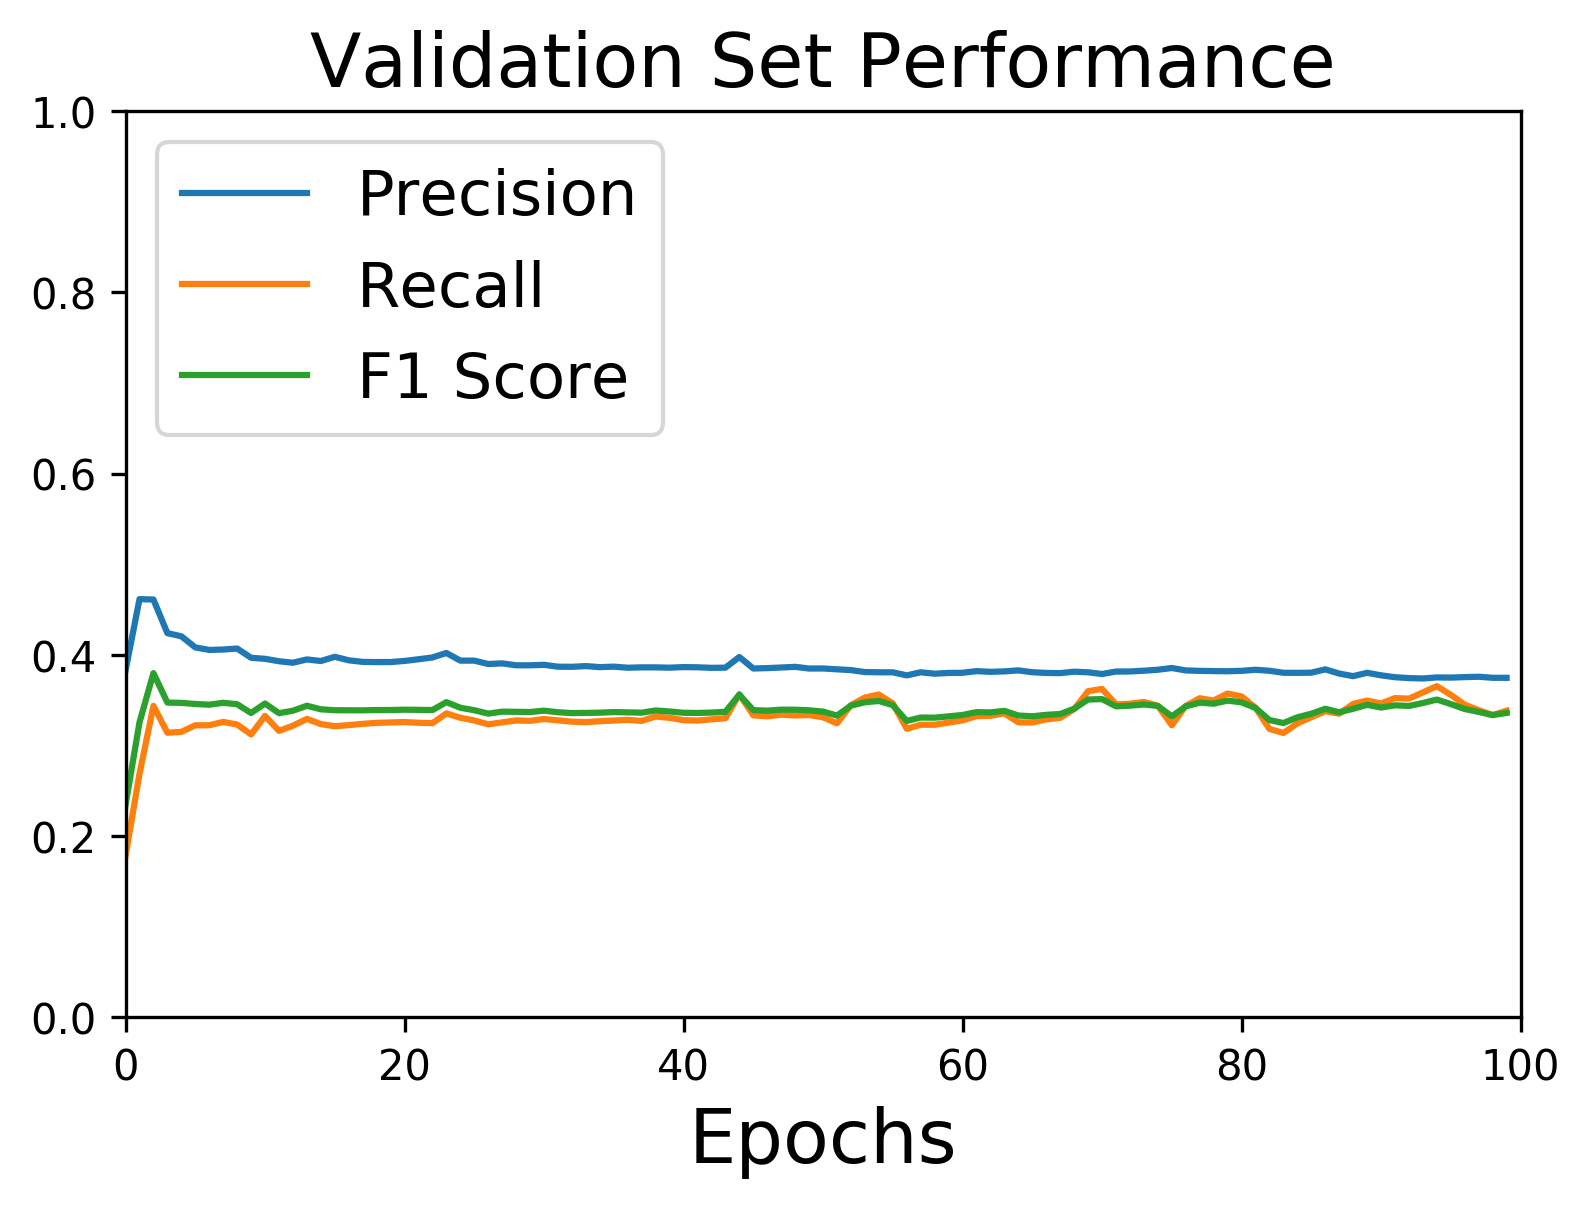

In [16]:
# x = np.arange(10)
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, precOverEpoch)
plt.plot(x, recOverEpoch)
plt.plot(x, f1OverEpoch)
plt.axis([0, nEpochs, 0, 1.0])

plt.legend(['Precision', 'Recall', 'F1 Score'], loc='upper left', fontsize = 15)
plt.title('Validation Set Performance', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
fig.savefig('src/plotting/resultPlotting/performance.png')
# plt.show()

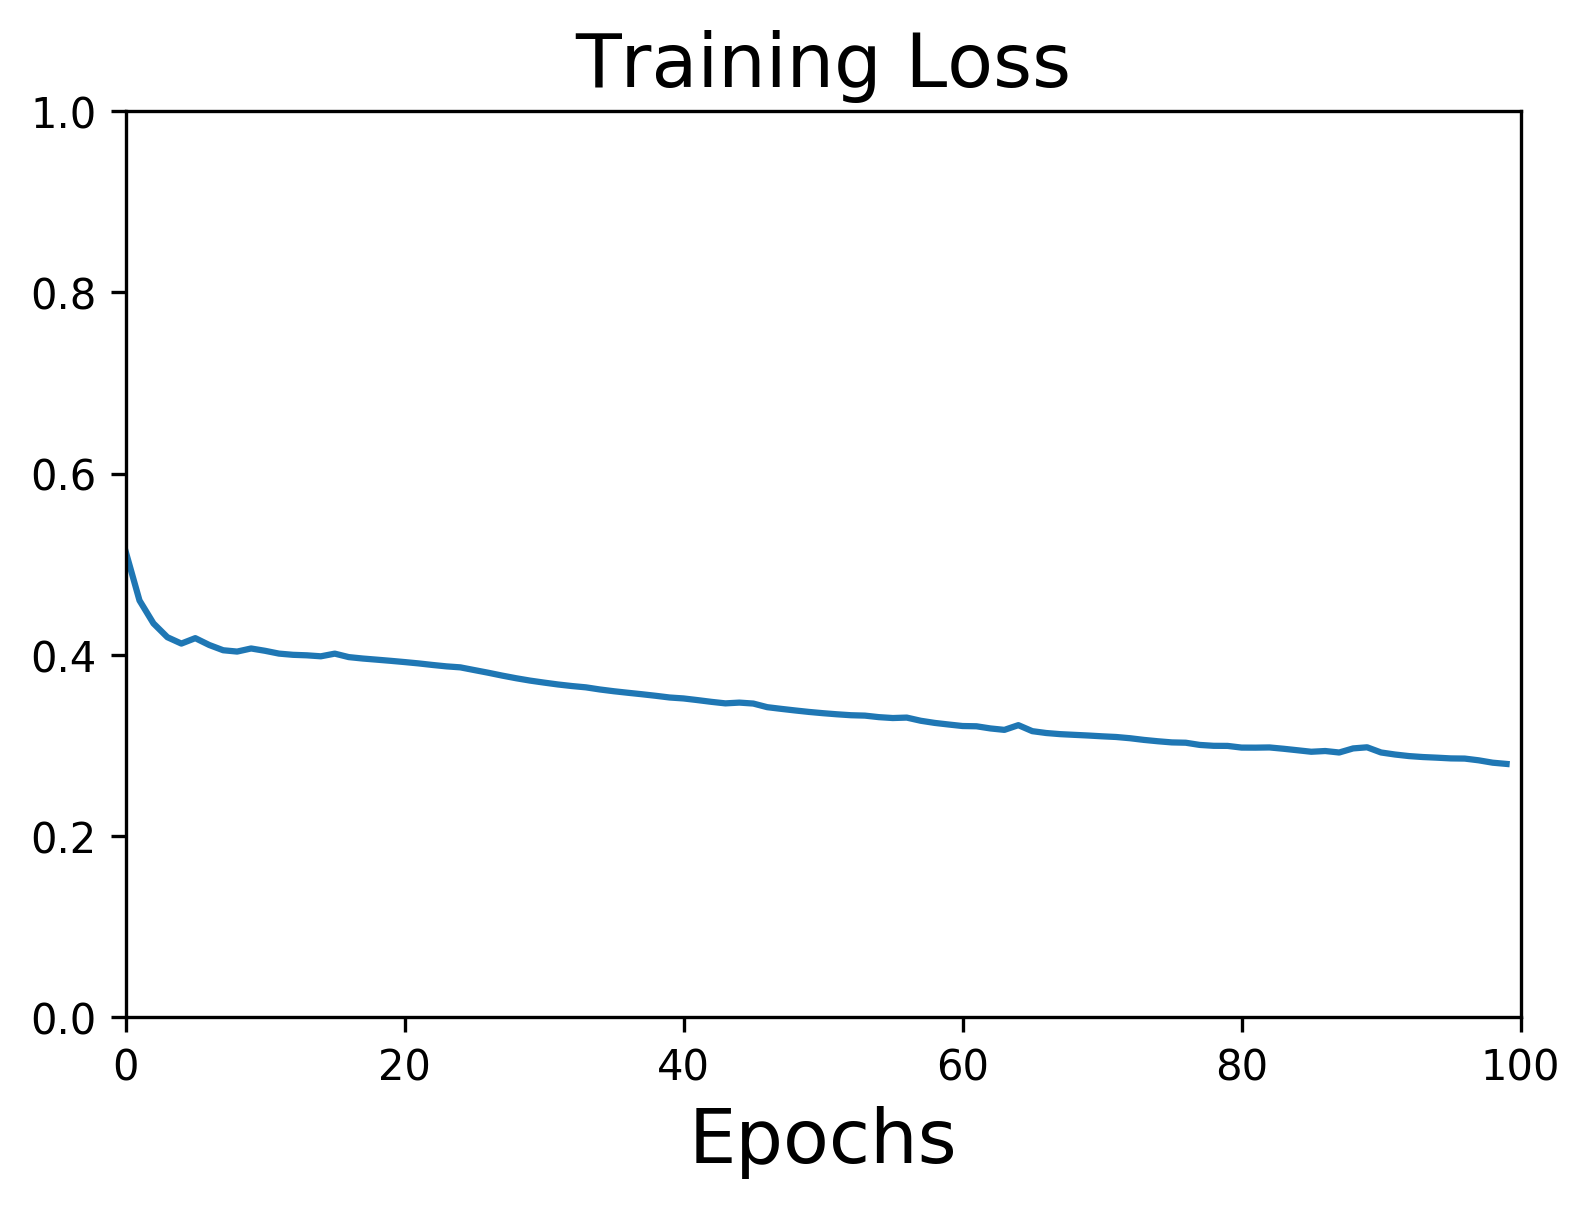

In [17]:
avgLoss
# x = np.arange(10)
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, avgLoss)
plt.axis([0, nEpochs, 0, 1.0])

# plt.legend(['Precision', 'Recall', 'F1 Score'], loc='upper left', fontsize = 15)
plt.title('Training Loss', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
fig.savefig('src/plotting/resultPlotting/trainingLoss.png')
# plt.show()

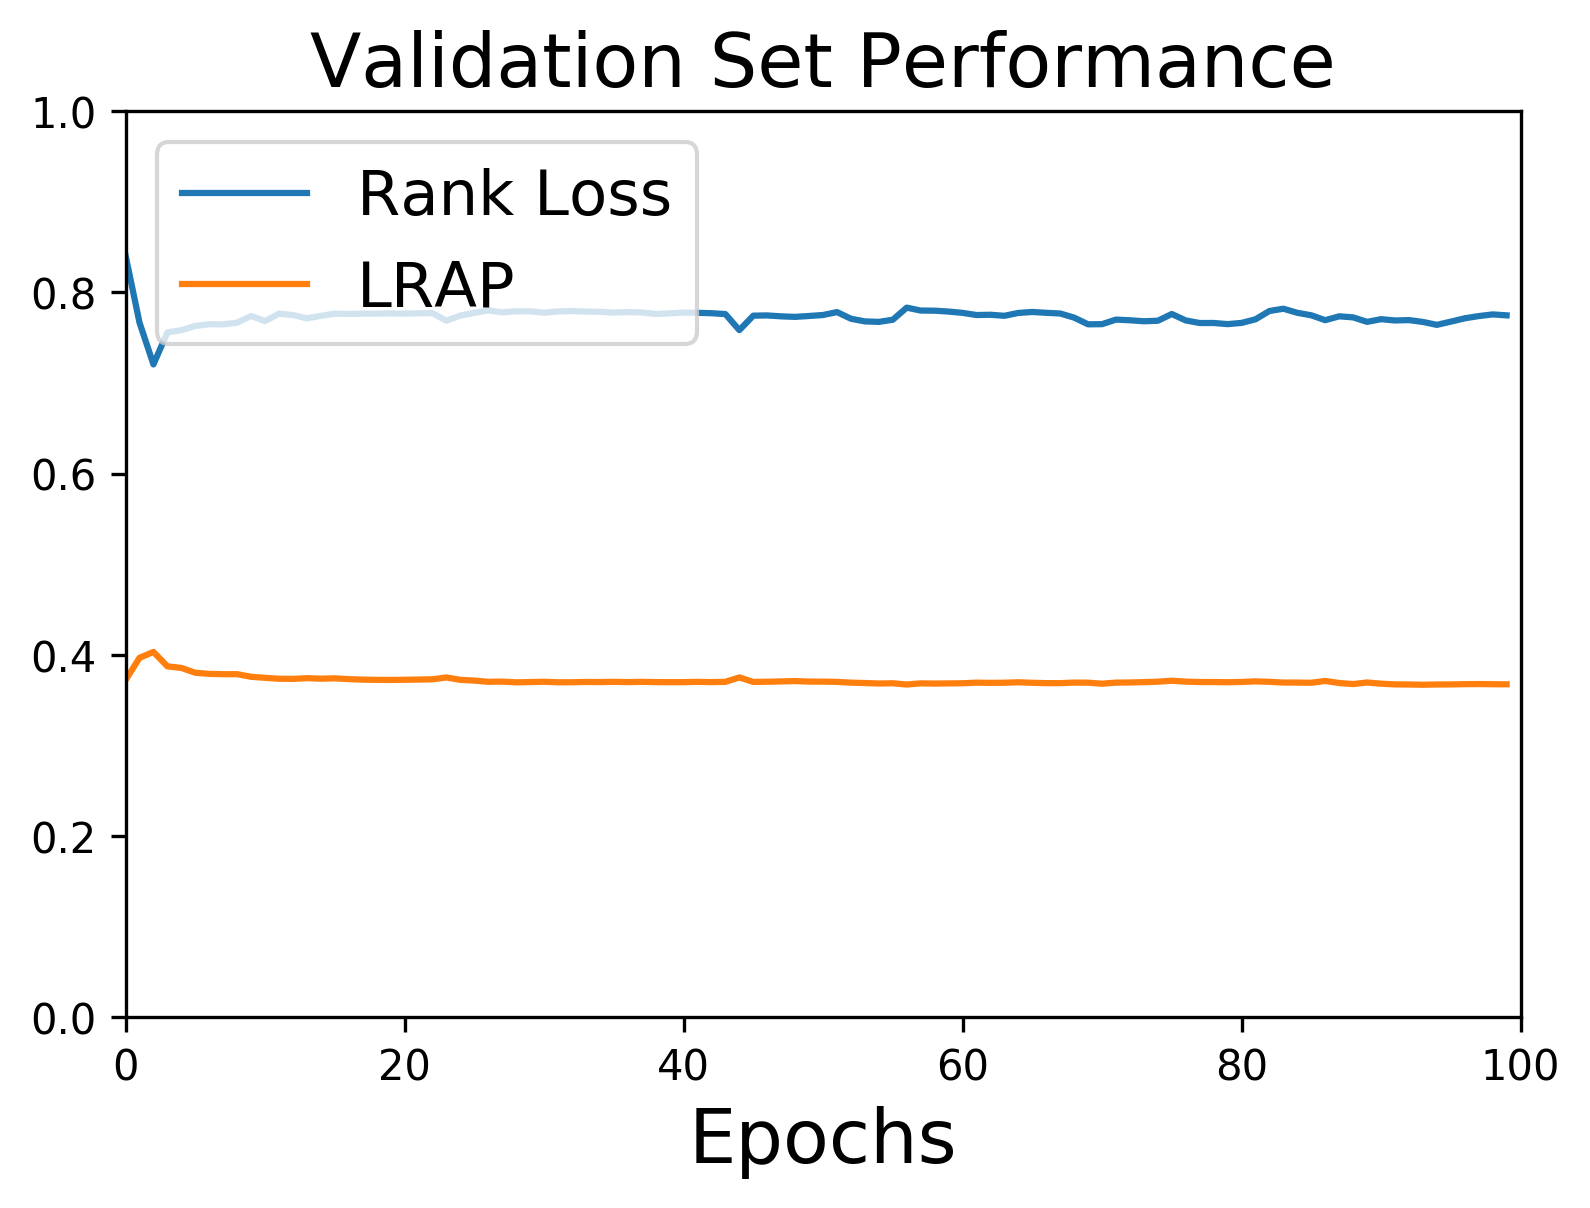

In [21]:
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, rankLossOverEpoch)
plt.plot(x, lrapOverEpoch)
plt.axis([0, nEpochs, 0, 1.0])

plt.legend(['Rank Loss', 'LRAP'], loc='upper left', fontsize = 15)
plt.title('Validation Set Performance', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
fig.savefig('src/plotting/resultPlotting/rankMetricsPerf.png')

The mean number of codes in the devSet is 6.698


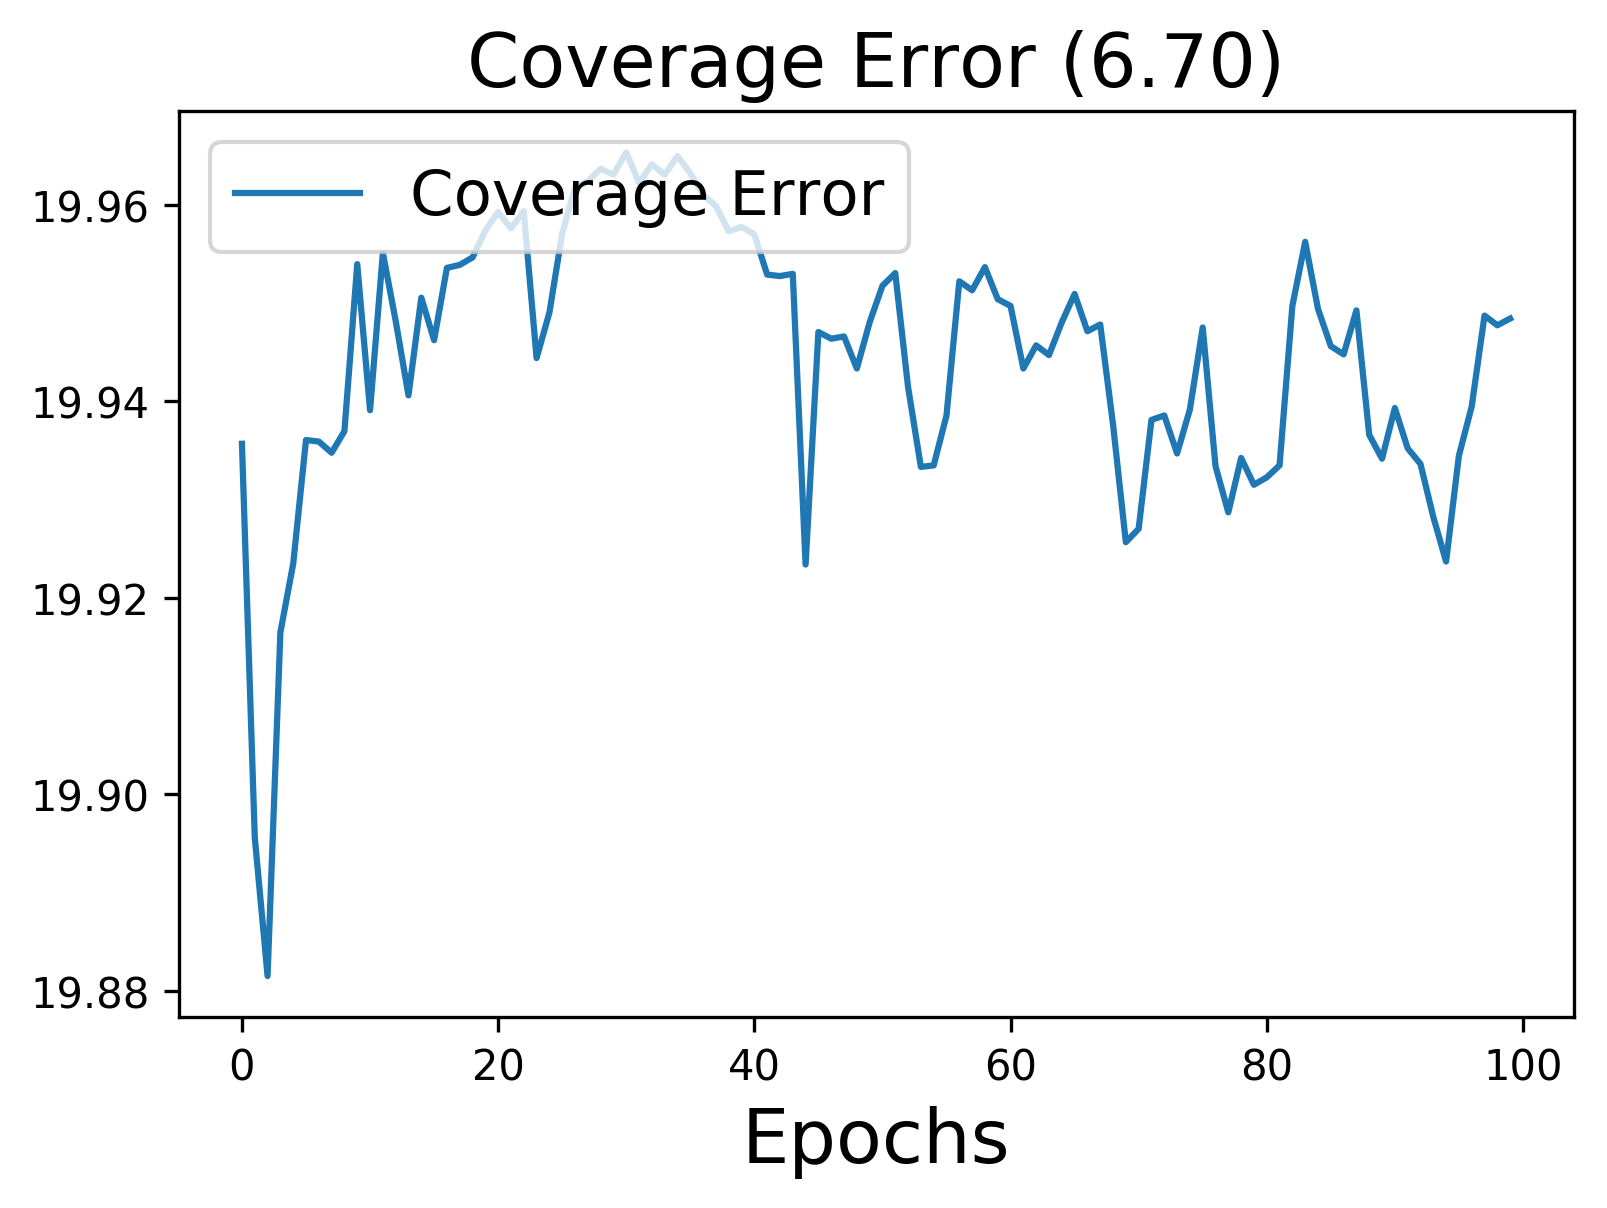

In [23]:
meanNumberOfCodes = np.sum(yTruth, axis = 1)
meanNumberOfCodes = np.mean(meanNumberOfCodes)
print('The mean number of codes in the devSet is %.3f'%meanNumberOfCodes)
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, coverErrOverEpoch)

plt.legend(['Coverage Error'], loc='upper left', fontsize = 15)
plt.title('Coverage Error (%.2f)'%(meanNumberOfCodes), fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
fig.savefig('src/plotting/resultPlotting/coverageError.png')

## Confusion Matrices
Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.


As of right now this code isn't real

In [38]:
temp = preds[99,:,:]
yTruth = yTruth
confusionMatrix = np.zeros(shape = (temp.shape[1], temp.shape[1]))
# print(confusionMatrix)-
currTruth = np.zeros(temp.shape[1])
currPred = np.zeros(temp.shape[1])
for colIdx in range(temp.shape[1]):
    currTruth = yTruth[:, colIdx]
    currPred = temp[:, colIdx]
    confMat = metrics.confusion_matrix(y_true = currTruth, y_pred = currPred)
    print(confMat)
    print('***************************')

[[10826     0]
 [ 2356     0]]
***************************
[[ 1891 11291]
 [    0     0]]
***************************
[[8988   56]
 [4104   34]]
***************************
[[2211 5226]
 [1370 4375]]
***************************
[[5957 4156]
 [1812 1257]]
***************************
[[6332 2108]
 [2829 1913]]
***************************
[[13128     2]
 [   52     0]]
***************************
[[7575 3924]
 [ 855  828]]
***************************
[[6201   70]
 [6899   12]]
***************************
[[5614 1784]
 [4370 1414]]
***************************
[[7580 5131]
 [ 310  161]]
***************************
[[2825  519]
 [8556 1282]]
***************************
[[4501 2921]
 [2694 3066]]
***************************
[[6814   47]
 [6315    6]]
***************************
[[4878 2779]
 [2529 2996]]
***************************
[[7985  979]
 [3505  713]]
***************************
[[ 959  941]
 [5295 5987]]
***************************
[[11750   412]
 [  988    32]]
**********************

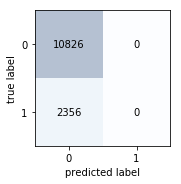

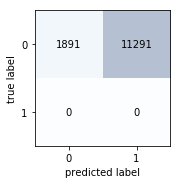

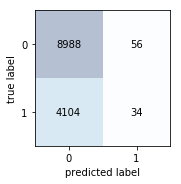

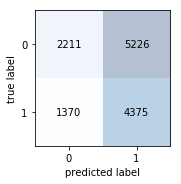

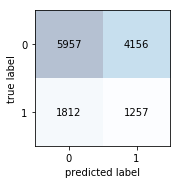

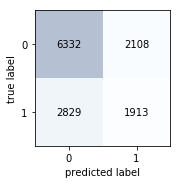

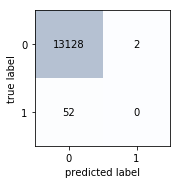

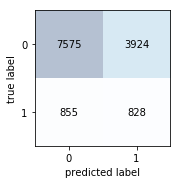

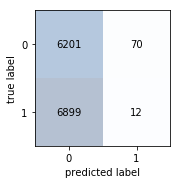

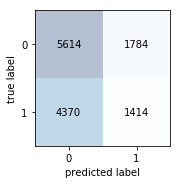

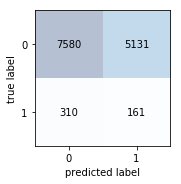

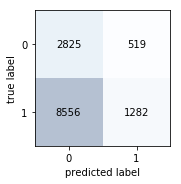

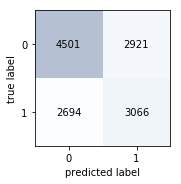

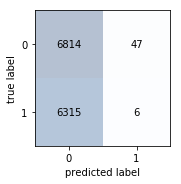

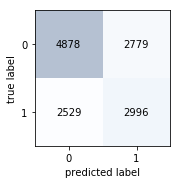

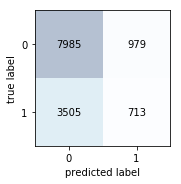

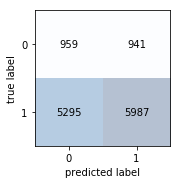

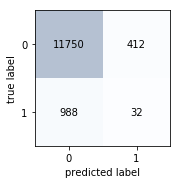

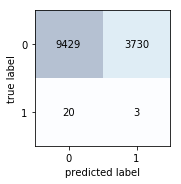

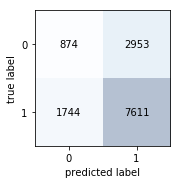

IndexError: index 20 is out of bounds for axis 1 with size 20

In [76]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


for i in range(preds.shape[0]):
    cm = confusion_matrix(y_target=yTruth[:,i], 
                          y_predicted=preds[99,:,i])
    plot_confusion_matrix(conf_mat=cm)
    plt.show()
